# Sprint 7, Tasca M7 T01: Algoritmes d’aprenentatge supervisat: Classificació

### Importació, ordenació i informació bàsica de les dades



In [1]:
# Importem les llibreries bàsiques 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

In [2]:
# Importo les dades del cocument txt i els hi poso el títol que els hi correspon a cada columna

wines = pd.read_csv(r'C:\Users\Anna\DataScience\SPRINTS\SPRINT 7 Classificacio\wineData.txt', encoding = "ISO-8859-1",delimiter=',')
wines.columns= ["class","alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoids_phenols", "proanthocyanins","color_intensity","hue","OD280/OD315_of_diluted_wines","proline"]

display(wines)

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wines.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         177 non-null    int64  
 1   alcohol                       177 non-null    float64
 2   malic_acid                    177 non-null    float64
 3   ash                           177 non-null    float64
 4   alcalinity_of_ash             177 non-null    float64
 5   magnesium                     177 non-null    int64  
 6   total_phenols                 177 non-null    float64
 7   flavanoids                    177 non-null    float64
 8   nonflavanoids_phenols         177 non-null    float64
 9   proanthocyanins               177 non-null    float64
 10  color_intensity               177 non-null    float64
 11  hue                           177 non-null    float64
 12  OD280/OD315_of_diluted_wines  177 non-null    float64
 13  proli

In [5]:
wines.shape

(177, 14)

In [6]:
wines.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline'],
      dtype='object')

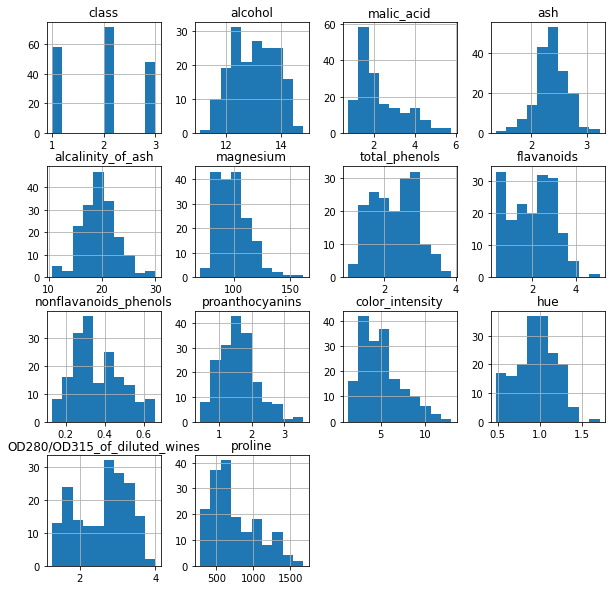

In [37]:
wines.hist()
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

## Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

ALGORITME K-NN (K - NEAREST NEIGHBORS)

In [154]:
# Dividim el dataset en X i y

X_features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline']
X = wines[X_features]
y = wines["class"]


In [202]:
# Dividim en train i test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [203]:
# Normalitzem (scaler) el rang de totes les característiques de manera que cada característica contribueixi de forma més proporcional a la distància final
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
# Importem la llibreria de classificació de KNN i diem que volem que es faci la classificació amb k=5 (és el valor que es sol utilitzar, és la quantitat de valors que ha de tenir més a prop alhora de classificar)
from sklearn.neighbors import KNeighborsClassifier
classificacio_knn = KNeighborsClassifier(n_neighbors=5)
classificacio_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [205]:
# Fem la predicció
y_pred = classificacio_knn.predict(X_test)

In [206]:
# Evaluació de l'algoritme
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [207]:
print("Precisió del K-NN en la part d'entrenament: {:.2f}"
     .format(classificacio_knn.score(X_train, y_train)))
print("Precisió del K-NN en la part de test: {:.2f}"
     .format(classificacio_knn.score(X_test, y_test)))

Precisió del K-NN en la part d'entrenament: 0.97
Precisió del K-NN en la part de test: 0.98


In [208]:
# Comparació de la taxa d'error amb el K-Value
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mitjà')

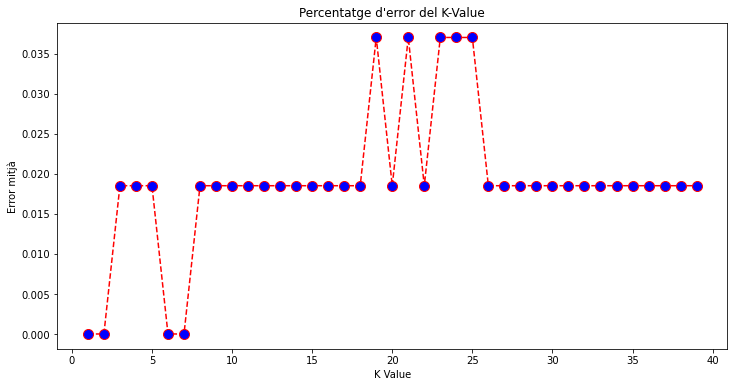

In [209]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title("Percentatge d'error del K-Value")
plt.xlabel('K Value')
plt.ylabel('Error mitjà')

ALGORITME SVM (Support Vector Machines)

In [168]:
X_features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline']
X = wines[X_features]
y = wines["class"]

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [211]:
#Aprofitem el train i test anterior, i la divisió per grups anterior i cridem a la llibreria necessària
from sklearn import svm

# I creem l'algoritme classificador
classificacio_sve = svm.SVC(kernel="linear")
classificacio_sve.fit(X_train, y_train)

SVC(kernel='linear')

In [212]:
# Fem la predicció
y_pred = classificacio_sve.predict(X_test)

In [213]:
# Evaluem l'algoritme, és a dir, volem saber en quin percentatge la classificació és correcta
from sklearn import metrics

print("La classificació és correcta un", (metrics.accuracy_score(y_test, y_pred))*100, " de vegades")

La classificació és correcta un 97.22222222222221  de vegades


In [214]:
# També podem avaluar la precisió i la recuperació del model

print("Precissió:", (metrics.precision_score(y_test,y_pred,average="micro"))*100)
print("Recuperació:", (metrics.recall_score(y_test,y_pred,average="micro"))*100)

# He provat de fer-ho amb kernel linear i poly i totes tres avaluacions em surten igual sempre, no sé per què

Precissió: 97.22222222222221
Recuperació: 97.22222222222221


ALGORITME XGBoost

In [174]:
# Importem la llibreria
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [175]:
# Utilitzo la separació de dades X,y feta anteriorment i converteixo el dataset en una estructurda de dades optimitzada anomenada Dmatrix
X_features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline']
X = wines[X_features]
y = wines["class"]

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [215]:
# Creo un train i test nou
# Dividim en train i test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [216]:
# Creo una instancia d'un objecte regressor XGBoost cridant a la classe XGBRegressor() des de la biblioteca XGBoost amb uns hiperparàmetres concrets
xgb_regressor = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, verbosity = 0)

In [217]:
# Creo l'algoritme classificador 
xgb_regressor.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [218]:
# Faig la predició
prediccio = xgb_regressor.predict(X_test)

In [219]:
# Calculo l'rmse invocant la funció del modul metrics
rmse = np.sqrt(mean_squared_error(y_test, prediccio))
print("RMSE: %f" % (rmse))

RMSE: 0.657604


In [220]:
# Ara faré una k-fold Cross Validation
# Primer creo una espècie de diccionari de paràmetres per crear un model de validació creuada triple invocant el mètode cv()
parametres = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 10, 'alpha': 10}

cv_resultats = xgb.cv(dtrain=data_dmatrix, params=parametres, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [221]:
# cv_resultats conté les mètriques rmse de train i test per a cada ronda d'impuls
cv_resultats.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.502976,0.056357,1.500794,0.123377
1,1.386959,0.046195,1.388364,0.129427
2,1.283967,0.043695,1.288652,0.125935
3,1.189494,0.036620,1.197208,0.127406
4,1.107248,0.033224,1.114055,0.119623


In [222]:
# Extraiem la mètrica final
print((cv_resultats["test-rmse-mean"]).tail(1))

#Veiem que l'rmse es redeuix considerablement des del càlcul anterior, i encara es podria reduir més aplicant tècniques de grid, bayesian , etc

49    0.365565
Name: test-rmse-mean, dtype: float64


In [223]:
# L'XGBoost ens dona la possibilitat de fer un arbre sobre el que hem fet abans
xgb_regressor =xgb.train(params=parametres, dtrain=data_dmatrix, num_boost_round=10) 

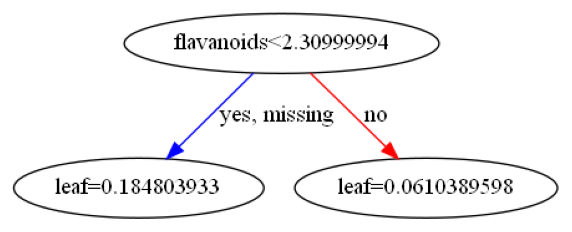

In [224]:
# Creem l'arbre ama matplotlib
xgb.plot_tree(xgb_regressor,num_trees=0)
plt.rcParams["figure.figsize"] =[10,10]
plt.show()

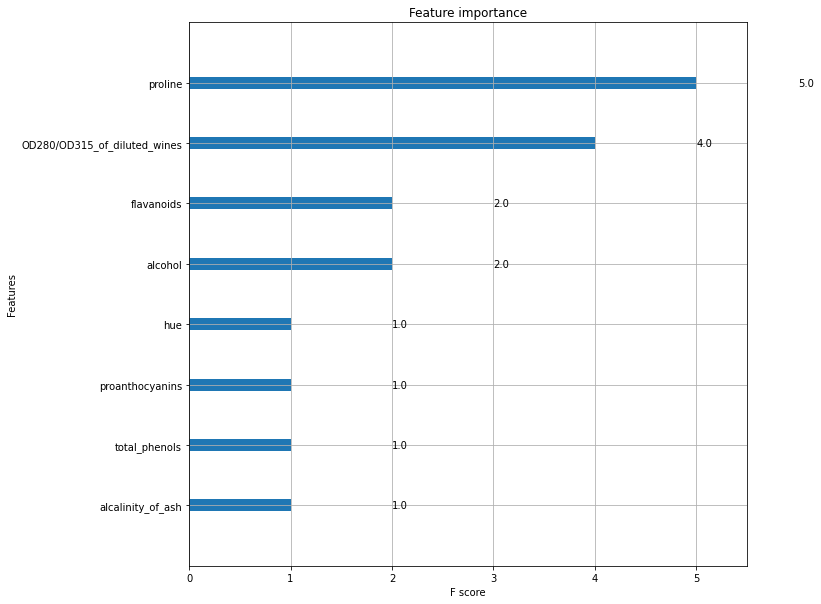

In [225]:
# Fem un gràfic que ens diu la imortància de cada factor en la classificació
xgb.plot_importance(xgb_regressor)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


## Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.





Tot això ho he fet a l'exercici 1 dins de cada classificació

## Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.





## Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.



També està fet dins l'exercici 1



## Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)
